In [1]:
import pandas as pd

In [2]:
#daha önceki işlemlerimiz supervisid learning bu hafta kümeleme yapacaz
#import warnings warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objs as go

In [4]:
df = pd.read_csv("resources/resources/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape  #kaç satır kaç sütun olduğunu tuple olarak döndürür

(200, 5)

In [6]:
df.info() #Genel bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T #sayısal olarak bilgi

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<Figure size 1400x500 with 0 Axes>

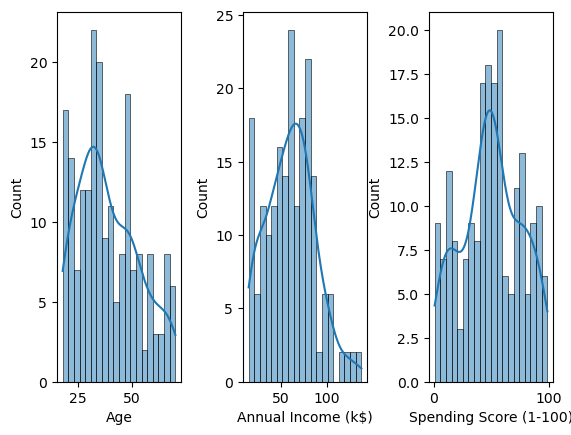

In [8]:
plt.figure(figsize=(14,5)) #grafiğin boyutunu belirledik
fig,ax=plt.subplots(1,3) #bi satırda 3 tane yan yana grafik göstercem diyo- 14e5 in içerisine 3 tane grafik yerleştirecek
plt.subplots_adjust(hspace=0.5,wspace=0.5) #grafikler arası boşluk
y=0
for col in df.columns[2:]: #for döngüsüyle 2den sonraki sütunların isimlerini getirdi
    sns.histplot(df[col],bins=20,kde=True,ax=ax[y]) #grafiği çizdirme kısmı--bins:histogramların genişliğini ayarlar
    #ax herbir sütuna ait grafik yerini belirler
    y+=1
#normal dağılım:std sapmanın -3 +3 arasında veriler dağılmaktadır

<Figure size 1400x500 with 0 Axes>

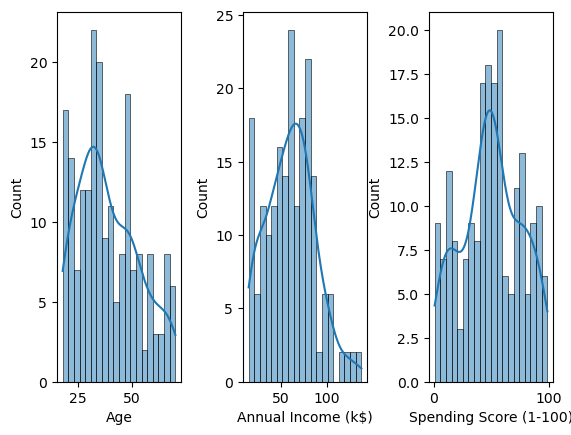

In [9]:
plt.figure(figsize=(14,5)) # 14 e 5 boyutunda 
fig, ax = plt.subplots(1,3) # 1 satırda 3 tane grafik göstereceğimizi gösteriyor
plt.subplots_adjust(hspace=0.5,wspace=0.5) # grafikler arası boşluk
y=0
for col in df.columns[2:]: # 2 den sonraki sütunların ismi
    sns.histplot(df[col],bins=20,kde=True,ax=ax[y]) #bin=histogram genişliği
    y+=1

<AxesSubplot: xlabel='count', ylabel='Gender'>

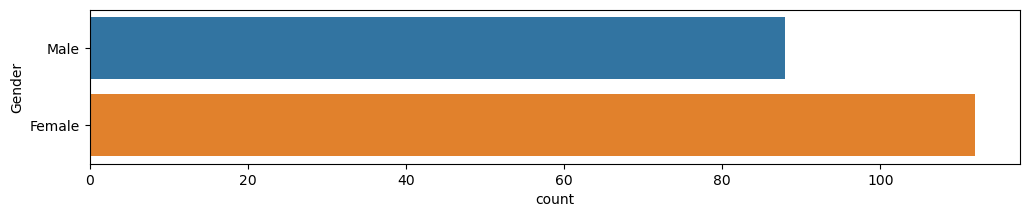

In [10]:
plt.figure(figsize=(12,2))
sns.countplot(data=df,y="Gender") #girilen columnun adetlerini gösteren grafiği çizer-->countplot

<Figure size 2000x1000 with 0 Axes>

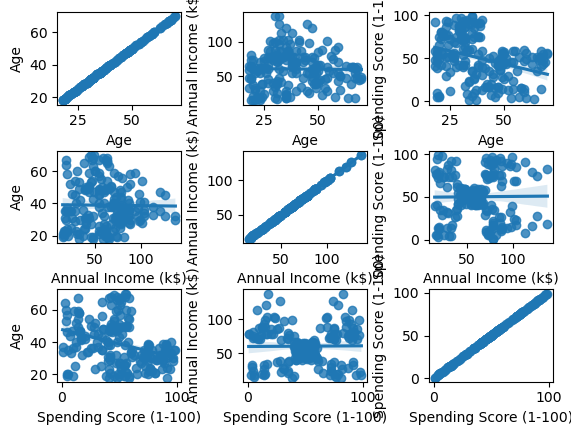

In [11]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(3, 3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
x= 0
for first in df.columns[2:]:
    y = 0
    for second in df.columns[2:]:
        sns.regplot(x = first, y = second, data=df, ax=ax[x, y]) #regresyon
        y += 1
    x += 1

<AxesSubplot: >

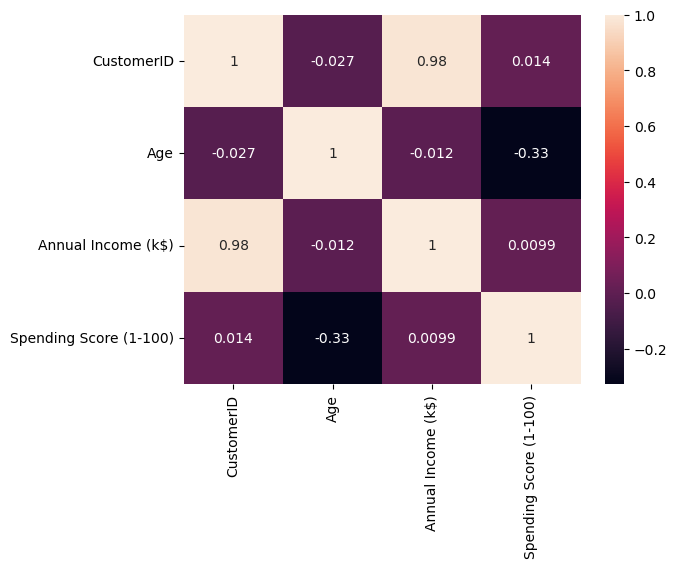

In [12]:
sns.heatmap(df.corr(),annot=True) #yukarıdaki grafikle aynı şeyleri veriyo

<AxesSubplot: xlabel='Age', ylabel='Annual Income (k$)'>

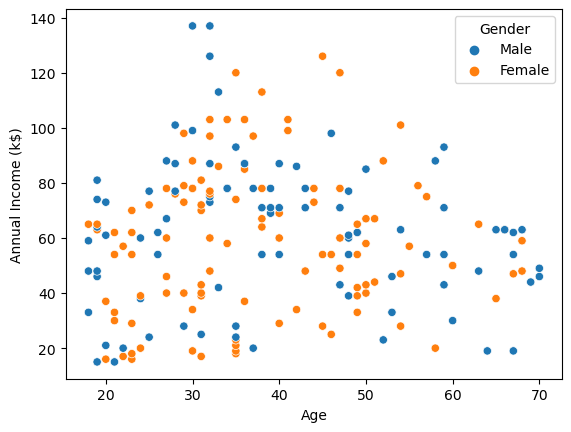

In [13]:
#age ile annual income arasındaki ilişkiyi scatterplotla çizdir.gender a göre renklendir
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df,hue="Gender")


In [14]:
X=df[df.columns[2:]]
X #y yok hedefimiz yok,ortak özelliklerine göre gruplara ayırcaz

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [15]:
#kmeans algoritması

In [16]:
uzaklik = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42)
    model.fit(X)
    uzaklik.append(model.inertia_)

c:\Users\msika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\msika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\msika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\msika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

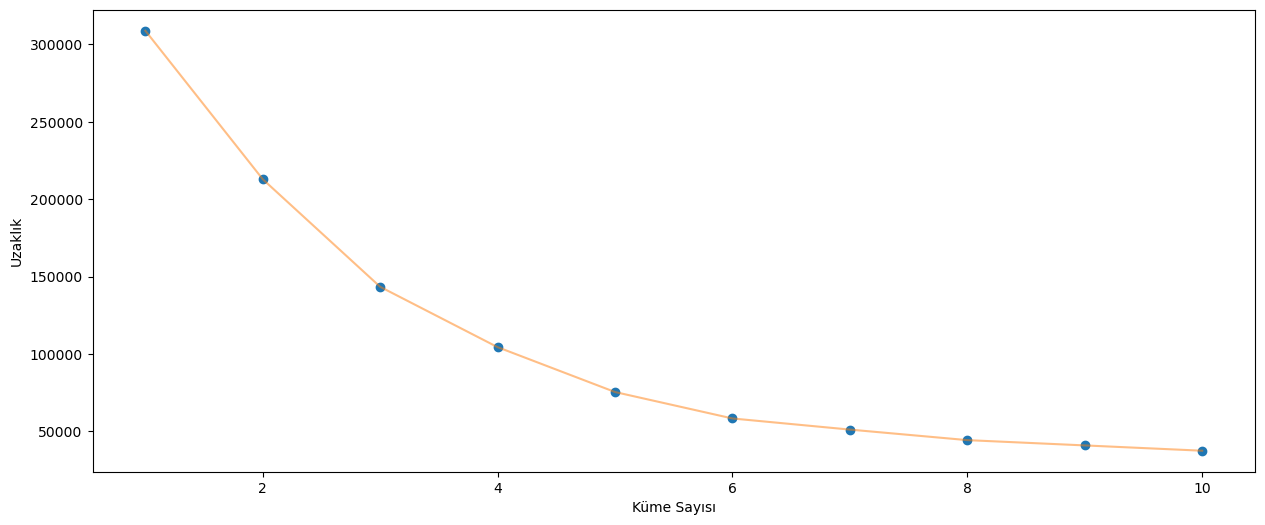

In [17]:
plt.figure(1 , figsize = (15 ,6)) #grafiğin dirsek yaptığı nokta optimum noktadır--bu grafik için 4 değeri
plt.plot(np.arange(1 , 11) , uzaklik , 'o')
plt.plot(np.arange(1 , 11) , uzaklik , '-' , alpha = 0.5)
plt.xlabel('Küme Sayısı') , plt.ylabel('Uzaklık')
plt.show()

In [18]:
#modelin labels ları hangi verinin hangi kümeye atandığını gösterir
model = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42 , algorithm='elkan') )
model.fit(X)
new_labels = model.labels_
merkezler = model.cluster_centers_